In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, minmax_scale

In [254]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [255]:
#step - 2 Clean the data
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [257]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [258]:
df.duplicated().sum()

0

In [259]:
# Remove leading and trailing spaces from values in the 'Classes' column
df['Classes'] = df['Classes'].str.strip()

In [260]:
#oneht encoding
encoder = OneHotEncoder(sparse=False)
 
# Fit and transform the 'Classes' column
encoded_classes = encoder.fit_transform(df[['Classes']])
 
# Assign the encoded values to the DataFrame
df[['Classes_fire', 'Classes_not_fire']] = encoded_classes
 
# Drop the original 'Classes' column
df.drop(columns=['Classes'], inplace=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [261]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not_fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0,0.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0.0,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0.0,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0.0,1.0


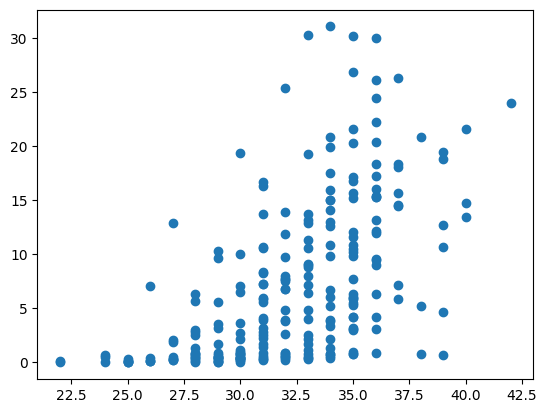

In [262]:
plt.scatter(df['Temperature'],df['FWI'])

<Axes: >

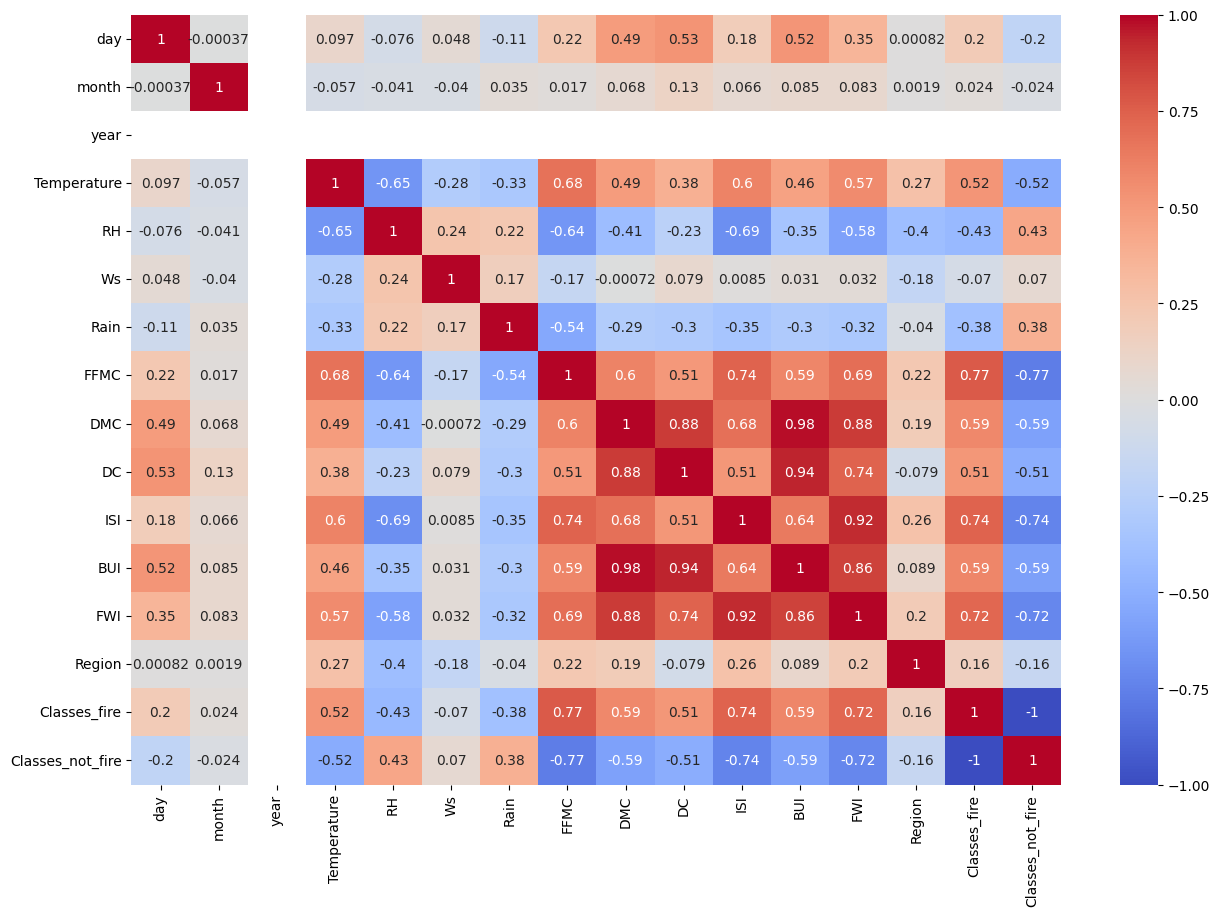

In [263]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap= 'coolwarm',annot=True)

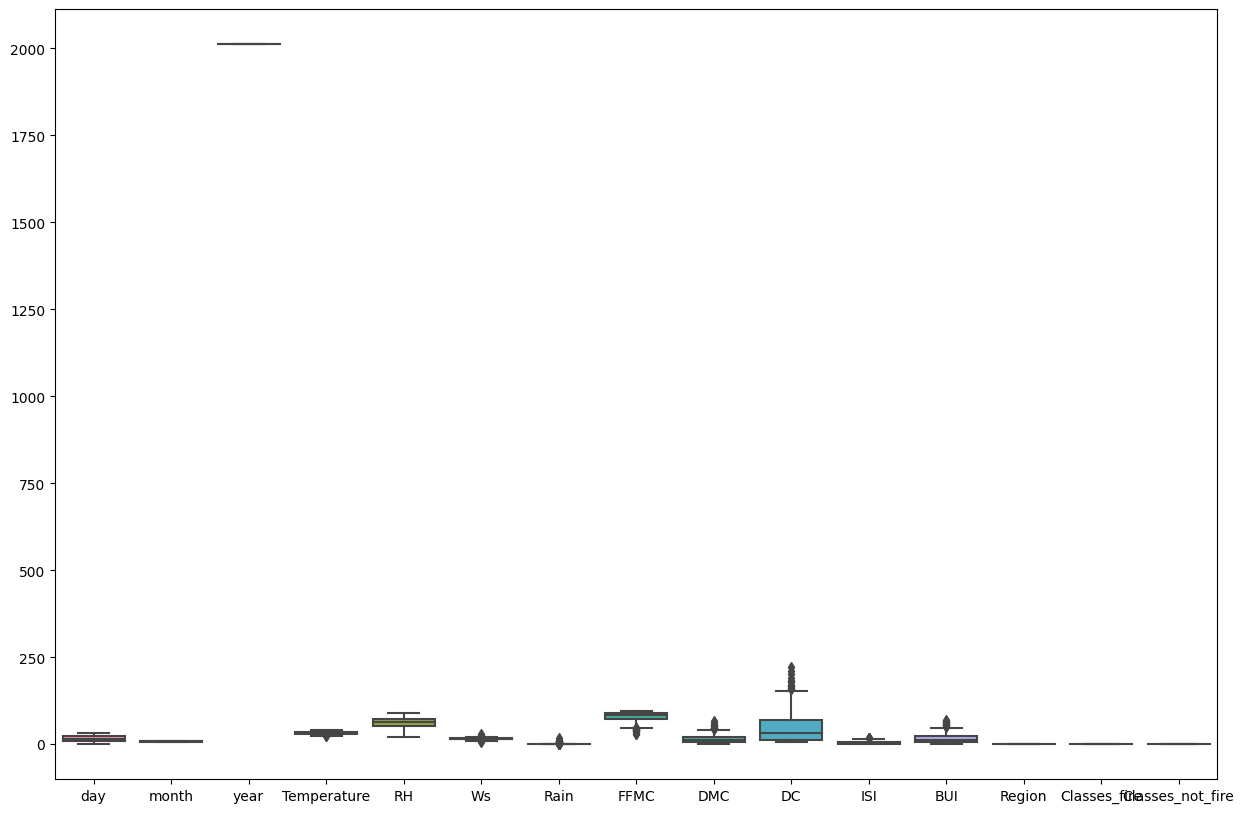

In [264]:
# prompt: create boxplots for all input variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['FWI']))
plt.show()

In [265]:
#remove outliers 
# Select only numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [266]:
print(numerical_columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_fire',
       'Classes_not_fire'],
      dtype='object')


In [267]:
# Define a threshold to identify outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers using the IQR method
outliers = df[((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

# Display outliers
print("\nOutliers:")
print(outliers)



Outliers:
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4  0.4   3.0   
15    16      6  2012           29  89  13   0.7  36.1   1.7   7.6  0.0   2.2   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
218    6      9  2012           34  71  14   6.5  64.5   3.3   9.1  1.0   3.5   
231   19      9  2012           29  41   8   0.1  83.9  24.9  86.0  2.7  28.9   
236   24      9  2012           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   

     FWI  Region

In [268]:
# Remove outliers from the dataset
cleaned_df = df[~((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

# Display the cleaned dataset
print("\nCleaned dataset:")
print(cleaned_df)


Cleaned dataset:
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4    7.6  1.3   
4      5      6  2012           27  77  16   0.0  64.8   3.0   14.2  1.2   
5      6      6  2012           31  67  14   0.0  82.6   5.8   22.2  3.1   
6      7      6  2012           33  54  13   0.0  88.2   9.9   30.5  6.4   
7      8      6  2012           30  73  15   0.0  86.6  12.1   38.3  5.6   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...    ...  ...   
235   23      9  2012           35  56  14   0.0  89.0  29.4  115.6  7.5   
237   25      9  2012           28  70  15   0.0  79.9  13.8   36.1  2.4   
238   26      9  2012           30  65  14   0.0  85.4  16.0   44.5  4.5   
241   29      9  2012           24  54  18   0.1  79.7   4.3   15.2  1.7   
242   30      9  2012           24  64  15   0.2  67.3   3.8   16.5  1.2   

      BUI   FWI  Region  Classes_fire  Classes_not_fire  
0     3.4  

In [269]:
# Exclude the column you want to exclude
X = cleaned_df.drop(['FWI'], axis=1)  # Features (independent variables) - excluding one column
Y = cleaned_df['FWI']  # Target (dependent variable)



In [270]:
#split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [271]:
scaler=StandardScaler()

In [272]:
X.shape, Y.shape

((177, 15), (177,))

In [273]:
X_train_sc=scaler.fit_transform(X_train)

In [274]:
X_test_sc=scaler.transform(X_test)

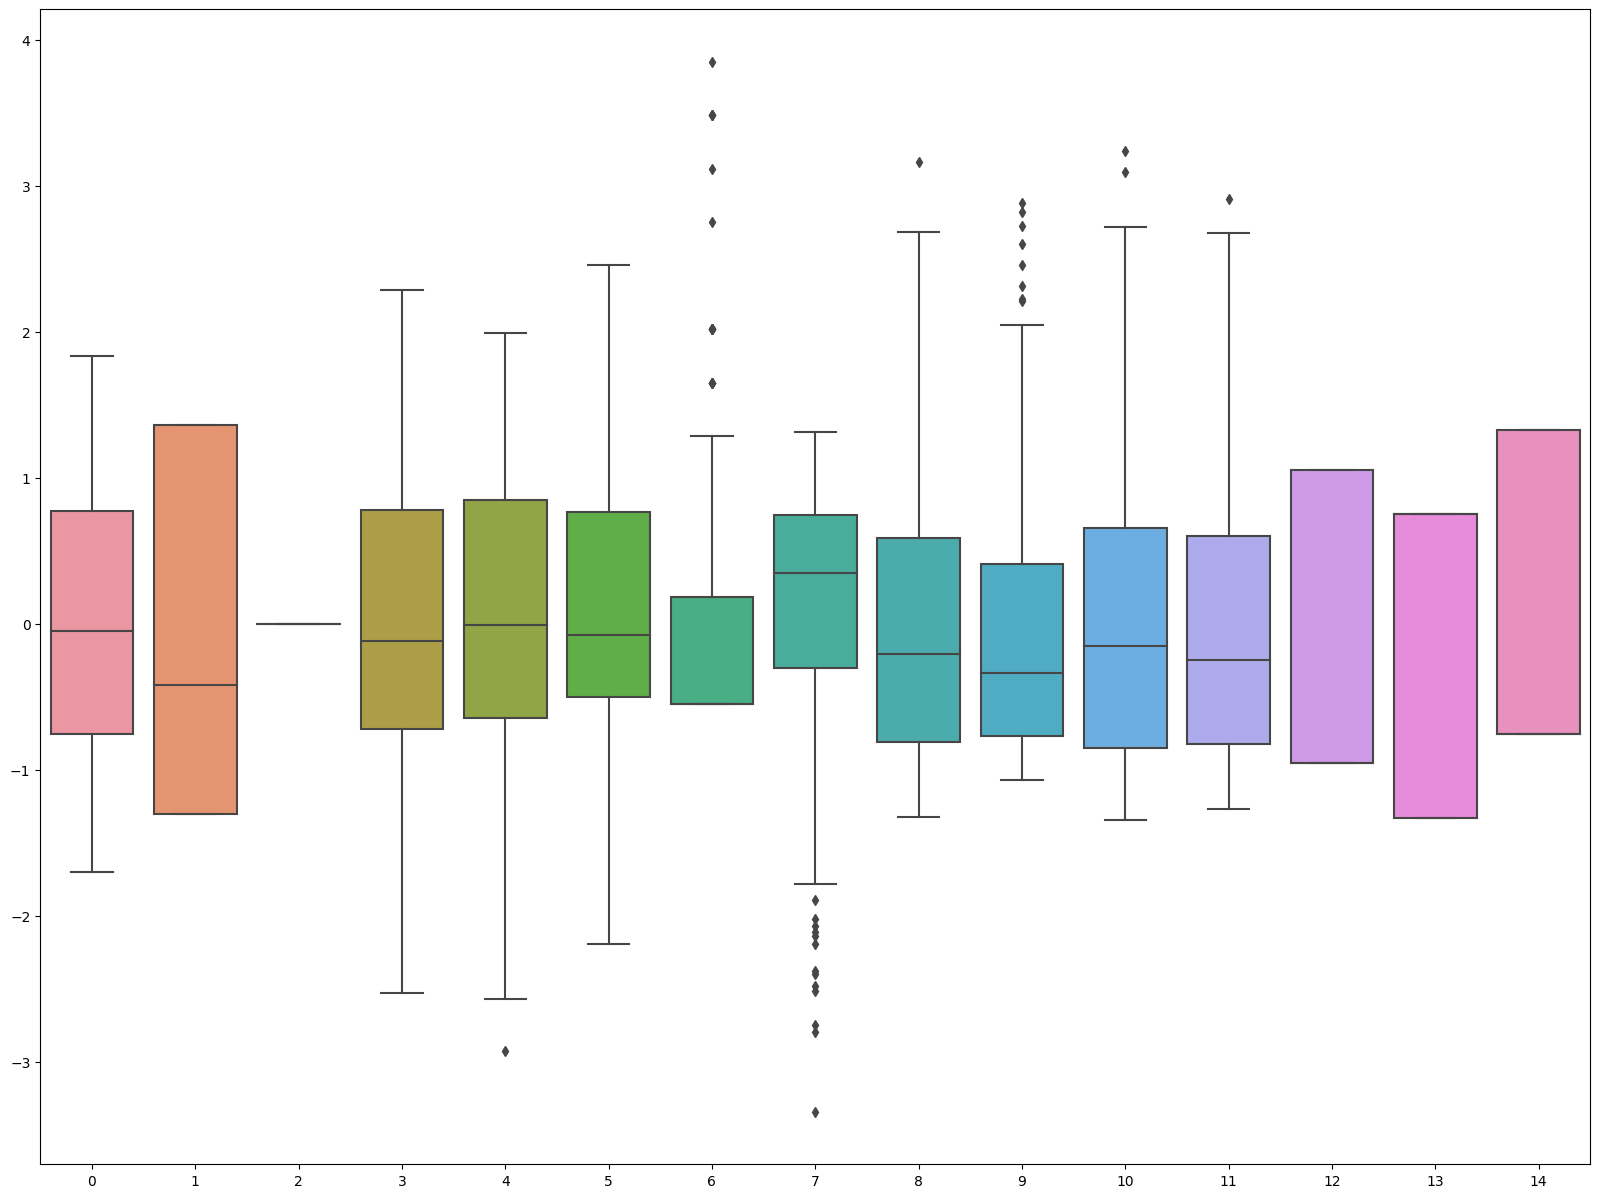

In [275]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_sc)
plt.show()

In [276]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((141, 15), (36, 15), (141,), (36,))

In [277]:
lr = LinearRegression()
lr.fit(X_train_sc,Y_train)

LinearRegression()

In [278]:
lr.coef_, lr.intercept_

(array([ 6.03703904e-02,  8.98331102e-02,  1.77635684e-15,  1.13804836e-01,
         3.72794704e-02,  2.36570898e-02, -1.53221049e-01, -8.41217842e-01,
        -3.09717758e-01, -5.74037252e-01,  4.45749363e+00,  3.25488623e+00,
        -1.54485990e-01,  9.82694104e-02, -9.82694104e-02]),
 6.732624113475179)

In [279]:
y_pred=lr.predict(X_test_sc)    # predicted value of y_test
 

In [286]:
y_pred

array([10.37472137,  2.42448706, 21.94641603,  3.24225985,  6.7480591 ,
        3.9125245 , 15.14511355,  3.12270219,  0.35831135,  5.92406326,
       -0.10078297,  0.96077946, 11.13665253,  9.99261076,  2.09699828,
        6.64007632, 11.76669525,  0.49182365,  0.7539555 , 17.86402394,
        8.26496548, 10.43874742,  3.09532038, 14.59217853, 20.90491258,
       10.93489462,  5.00902015, 10.12496204,  0.95917643,  0.59464729,
        6.78689752,  9.0820279 , 10.12677146,  8.18933998,  1.1677103 ,
        4.5405977 ])

In [280]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(Y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.27390387786747267
Mean Absolute Error (MAE): 0.3617412814735144
R-squared (R2): 0.991896488517201


In [281]:
# prompt: calculate adjusted r2

r2_adj = 1 - ((1-r2)*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1)

In [282]:
r2_adj

0.9858188549051018

In [283]:
import pickle

In [284]:

pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))

In [285]:
pickle.dump(scaler, open('scaler1.pkl', 'wb'))



**Pickle is used in Python for serializing and deserializing objects, enabling data persistence and convenient sharing of complex objects like machine learning models. It is compatible with different Python versions, efficient due to its binary format, and customizable via __getstate__() and __setstate__() methods. However, its main drawback is the lack of security, as it is prone to errors or malicious attacks. Thus, it's important to use pickle only with trusted data and avoid unpickling data from untrusted sources. In summary, pickle offers data persistence, convenience, compatibility, efficiency, and customization, but with some security risks.**
